#### Artificial Intelligence - Regressions

---


## Team Members
| Name (Alphabetically ordered)| StdNo |
| ----------- | ----------- |
| Sam Asadi | 9532287 |
| Hossein Dehghanipour | 9532250 |
| Bahare Moradi | 9532245 |

Shiraz University - Spring 2020
## Part A (Mostafa Asadi)

---
#### Model:
$$ h(x) = \theta_1 x * \theta_0 $$
#### Cost function:
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^i) - y)^2 $$
#### Gradient Descent:
$$ \theta_j = \theta_j - \alpha \frac{\partial d}{\partial x} J (\theta_0, \theta_1) $$
#### Therfore:
$$ \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m [(h_\theta (x_i)-y)x_i] $$

>$\theta_j$: Weights of the hypothesis.

>$h_\theta(x_i)$: Predicted y value for ith input.

>$j$: Feature index number (can be 0, 1, 2, ......, n).

>$\alpha$: Learning Rate of Gradient Descent.

---

Importing Libraries

In [4]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

pd.options.mode.chained_assignment = None

Reading files with pnadas

In [5]:
file_name_1 = 'Dataset1.txt'
file_name_2 = 'Dataset2.txt'

def read_data(file_name):
    data = pd.read_csv(file_name, delimiter=";")
    return data

data_1 = read_data(file_name_1)
data_2 = read_data(file_name_2)

#print (data_1)
#print (data_2)

Ploting models with function below

In [6]:
def plot_model(dataset, model, label):
    x = np.linspace(0,1,100)
    plt.title(label)
    plt.plot(x, model[1] * x + model[0], '-r')
    plt.plot(dataset['Height'].values.tolist(), dataset['Weight'].values.tolist(), 'bo', marker = '.')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.axis([0, 1, 0, 1])
    plt.grid()
    plt.show()

#### Normalizing data with this:
$$ data_i =\frac{data_i - min(data)}{max(data) - min(data)} $$
> Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.
It is required only when features have different ranges.

In [7]:
def normalize(data):
    max_height, max_weight = max(data['Height']), max(data['Weight'])
    min_height, min_weight = min(data['Height']), min(data['Weight'])

    data_copy = data.copy()

    for i in range(len(data['Height'])):
        data_copy['Height'][i] = (data['Height'][i] - min_height)/(max_height - min_height)
    for i in range(len(data['Weight'])):
        data_copy['Weight'][i] = (data['Weight'][i] - min_weight)/(max_weight - min_weight)
        
    return data_copy

normalized_data_1 = normalize(data_1)
normalized_data_2 = normalize(data_2)
# print (normalized_data_1)
# print ("=======")
# print (normalized_data_2)

Here we are using gradient descent algorithm

In [8]:
def theta_j(dataset, theta):
        theta_0, theta_1 = 0, 0
        for i in range(len(dataset)):
            theta_0 += ((theta[1] * dataset['Height'][i] + theta[0]) - dataset['Weight'][i])
            theta_1 += ((theta[1] * dataset['Height'][i] + theta[0]) - dataset['Weight'][i]) * dataset['Height'][i]
        return theta_0, theta_1

def gradient_descent(dataset, theta=[0, 0], alpha = 0.28, iterations = 150):
    m = len(dataset)
    
    for iteration in range (iterations):
        new_theta = [0, 0]
        
        updated_0, updated_1 = theta_j(dataset, theta)
        new_theta[0] = theta[0] - alpha * (updated_0/m)
        new_theta[1] = theta[1] - alpha * (updated_1/m)
        
        theta = new_theta
            
    return theta

theta_dataset_1 = gradient_descent(normalized_data_1)
theta_dataset_2 = gradient_descent(normalized_data_2)

Plotting gradient descent result.

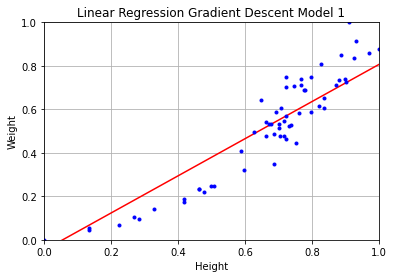

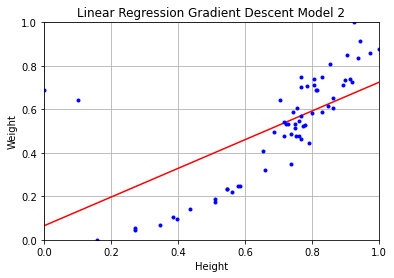

In [9]:
plot_model(normalized_data_1, theta_dataset_1, 'Linear Regression Gradient Descent Model 1')
plot_model(normalized_data_2, theta_dataset_2, 'Linear Regression Gradient Descent Model 2')

One of these datasets have some outliers(Dataset2). Does it affect the robustness of the model? Explain.(think about effect outlier on regression)
> Yes, it does affect the robustness. you can see that outliers pushing the hypothesis line away from the best result. Because they (outliers) don't match the other datas, they are gonna make the hypothesis line close to them.

#### Closed form:
$$ \theta = (X^{T}X)^{-1}X^{T} y $$

---

Running closed form algorithm and plotting it

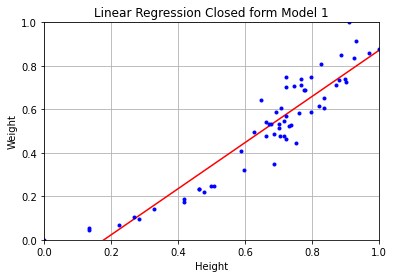

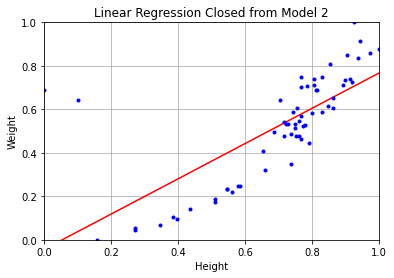

In [10]:
def closed_form(dataset):
    x = dataset['Height'].values.tolist()
    y = dataset['Weight'].values.tolist()
    X = np.c_[x, np.ones(len(x))]
    theta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(np.transpose(y))
    theta[0], theta[1] = theta[1], theta[0]
    return theta

theta_dataset_1 = closed_form(normalized_data_1)
theta_dataset_2 = closed_form(normalized_data_2)

plot_model(normalized_data_1, theta_dataset_1, 'Linear Regression Closed form Model 1')
plot_model(normalized_data_2, theta_dataset_2, 'Linear Regression Closed from Model 2')

#### Sigmoid function:
$$ f(x) = \frac{1}{1 + e^{-x}} $$

> The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

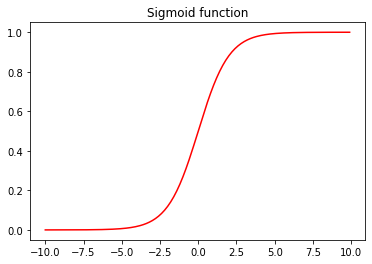

In [11]:
def plot_sigmoid():
    x = np.arange(-10, 10, 0.1)
    y = 1 / (1 + np.exp(- x))
    plt.plot(x, y, 'r-')
    plt.title('Sigmoid function')
    plt.show()

plot_sigmoid()

#### Plot $J(\theta)$

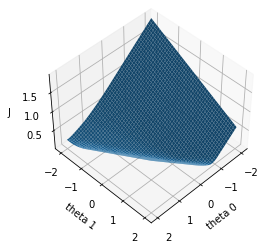

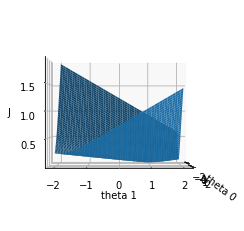

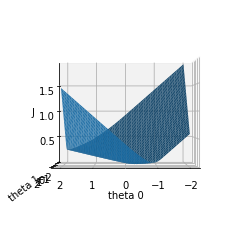

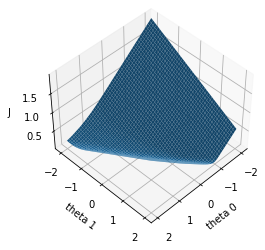

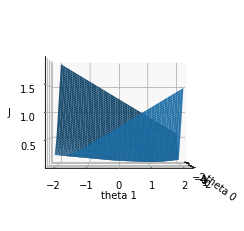

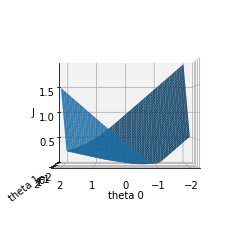

In [12]:
def j(theta, dataset):
        J = []
        for i in range(len(theta[1])):
            temp = []
            for j in range(len(theta[1][i])):
                y = np.sum(np.sqrt(((theta[1][i][j]*dataset['Height'][:]+theta[0][i][j]) - dataset['Weight'][:])**2)) / (2*len(dataset))
                temp.append(y)
            J.append(temp)
        return J

def plot_j_theta(dataset):
    
    def plot_deg(a, b):
        fig = plt.figure()
        plot = plt.axes(projection='3d')
        plot.view_init(a, b)
        plot.plot_surface(theta[0], theta[1], J)
        plot.set_xlabel('theta 0')
        plot.set_ylabel('theta 1')
        plot.set_zlabel('J')
        
    theta = []
    theta.append(np.linspace(-2, 2, 50))
    theta.append(np.linspace(-2, 2, 50))
    theta[0], theta[1] = np.meshgrid(theta[0], theta[1])

    J = np.array(j(theta, dataset))
    plot_deg(45, 45)
    plot_deg(0, 0)
    plot_deg(0, 90)
    
plot_j_theta(normalized_data_1)
plot_j_theta(normalized_data_2)